In [1]:
import numpy as np
import seaborn as sns
%pylab inline
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
pi = np.pi
a = 1
R = 300

# 3D case

In [3]:
# this is what we will use to find the roots of to get the radius
# for a specific frequency value
r_f = lambda r, f, R, a: f - (a**2/(4*pi))*(1/r**2 - r/R**3)
r_f_ = np.vectorize(r_f)

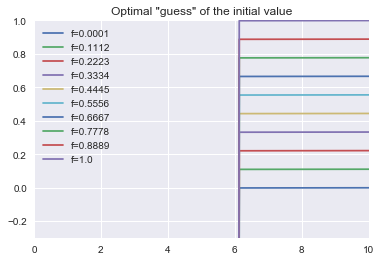

In [4]:
r_ = np.linspace(0.01, R)
for f_ in np.linspace(0.0001,1, num=10):
    plt.plot(r_, r_f_(r_, f_, R, a), label='f='+str(f_))
plt.ylim([-0.3,1])
plt.xlim([0,10])
plt.legend()
plt.title('Optimal "guess" of the initial value')

In [5]:
from scipy import optimize

In [6]:
def pf_3d(f, R, a):
    # find the root
    r_ = optimize.root(r_f, 1, args=(f, R, a)).x[0]
    return ((8*pi**2)/a**2)*(r_**5/(1+r_**3/(2*R**3)))

In [7]:
sns.set_style('white')

In [1]:
f = np.linspace(0.000001,0.20,num=1000)

# plt.figure(figsize=(10,3.5))

plt.subplot(111)

pf_3d_ = np.vectorize(pf_3d)
pdf = pf_3d_(f, R, a)
not_nans = np.logical_not(np.isnan(np.log10(pdf)))
plt.plot(np.log10(f)[not_nans], np.log10(pdf)[not_nans])
# plt.plot(np.ones(50)*-3.75, np.linspace(0,18), '--')
plt.xlabel('log10(frequency)')
plt.ylabel('log10(p(f))')
# plt.ylim([0,8])
sns.despine()

# lt3 = np.logspace(-10,-3.75)
# p_lt3 = pf_3d_(lt3, R, a)
# lt3_results = stats.linregress(np.log10(lt3), np.log10(p_lt3))

# gt3 = np.logspace(-3.75,0.0000000001)
# p_gt3 = pf_3d_(gt3, R, a)
# gt3_results = stats.linregress(np.log10(gt3)[:-9], np.log10(p_gt3)[:-9])

plt.text(-5,10.5, 'slope = '+str(np.around(lt3_results.slope, 2)))
plt.text(-3,8.5, 'slope = '+str(np.around(gt3_results.slope, 2)))

plt.ylim(ymin=0)
plt.title('3D Spherical Tumor Growth')


# plt.subplot(122)

# # the radius as a function of frequency (solved by hand)
# r = lambda f, R, a: (np.sqrt((pi*f*R**2)**2+a*R**2)-pi*f*R**2)/a

# # the probability of observing a certain frequency
# pf = lambda f, R, a: ((4*pi**2/a) * r(f, R, a)**3)/(1+a*r(f,R,a)**2/R**2)

# # get frequencies from ≈0 to 1
# f = np.linspace(0.0000000001,1,num=1000)

# pf_ = np.vectorize(pf) # vectorize for easier evaluation
# pdf = pf_(f, R, a)

# plt.plot(np.log10(f), np.log10(pdf))
# plt.plot(np.ones(50)*-3, np.linspace(0,8), '--')
# plt.xlabel('log10(frequency)')
# plt.ylabel('log10(p(f))')
# plt.ylim([0,8])
# sns.despine()
# plt.title('2D Circular Tumor Growth')

# lt3 = np.logspace(-10,-3)
# p_lt3 = pf_(lt3, R, a)
# lt3_results = stats.linregress(np.log10(lt3), np.log10(p_lt3))

# gt3 = np.logspace(-3,0.0000000001)
# p_gt3 = pf_(gt3, R, a)
# gt3_results = stats.linregress(np.log10(gt3)[:-9], np.log10(p_gt3)[:-9])

# plt.text(-8,7.5, 'slope = '+str(lt3_results.slope))
# plt.text(-2,6.5, 'slope = '+str(gt3_results.slope))


# sns.despine()

# plt.savefig('3D_growth.pdf')


NameError: name 'np' is not defined